# House Price Prediction which Model Prefect and Predict Values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data set
data = pd.read_csv("C:/Users/DELL/Downloads/data.csv")
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,5/2/2014 0:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,5/2/2014 0:00,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,5/2/2014 0:00,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,5/2/2014 0:00,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,5/2/2014 0:00,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [3]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [4]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

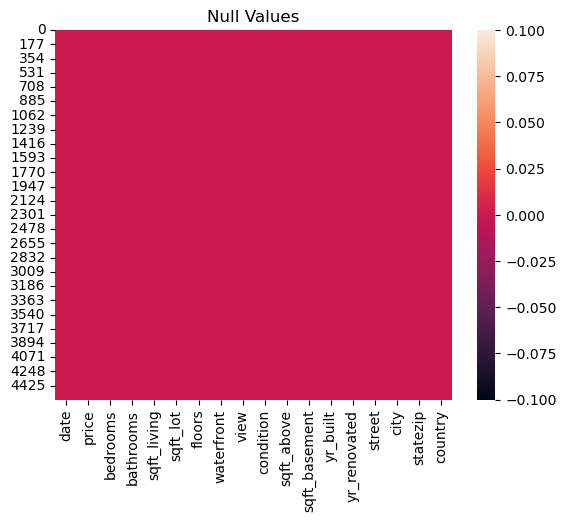

In [8]:
#visual representation 
sns.heatmap(data.isnull())
plt.title('Null Values')
plt.show()

In [5]:
#correlation Give Data

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data_corr = data.apply(LabelEncoder().fit_transform)

In [7]:
corr_data = data_corr.corr()

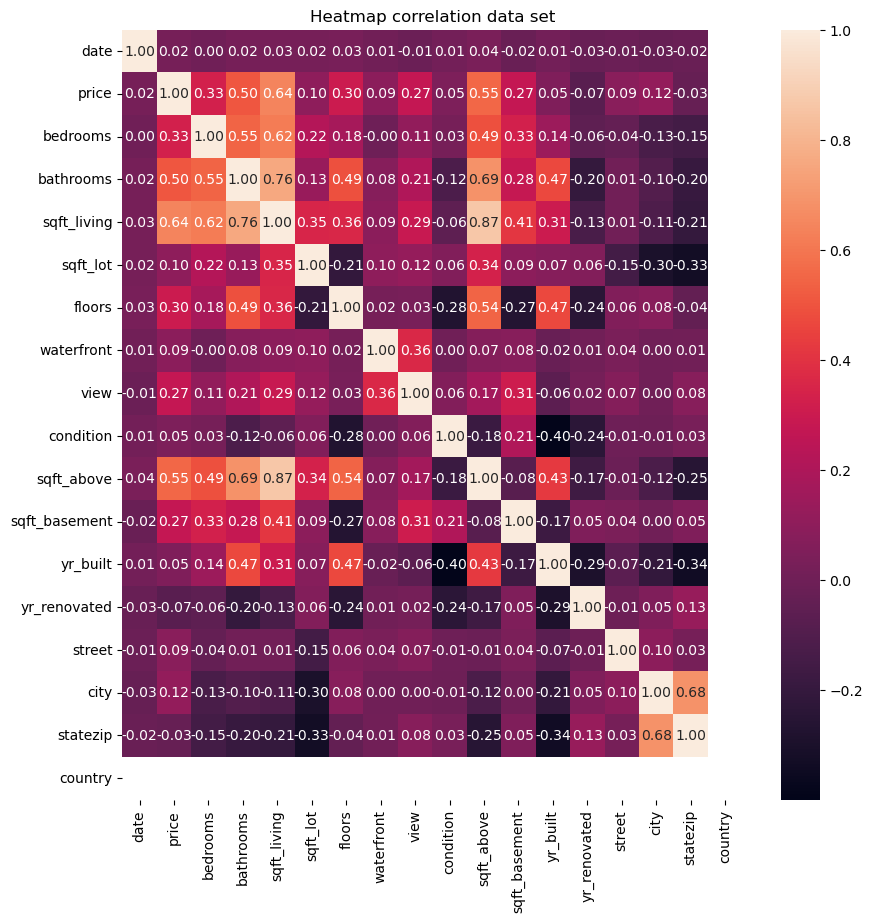

In [8]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_data, annot=True, fmt='.2f')
plt.title('Heatmap correlation data set')
plt.show()

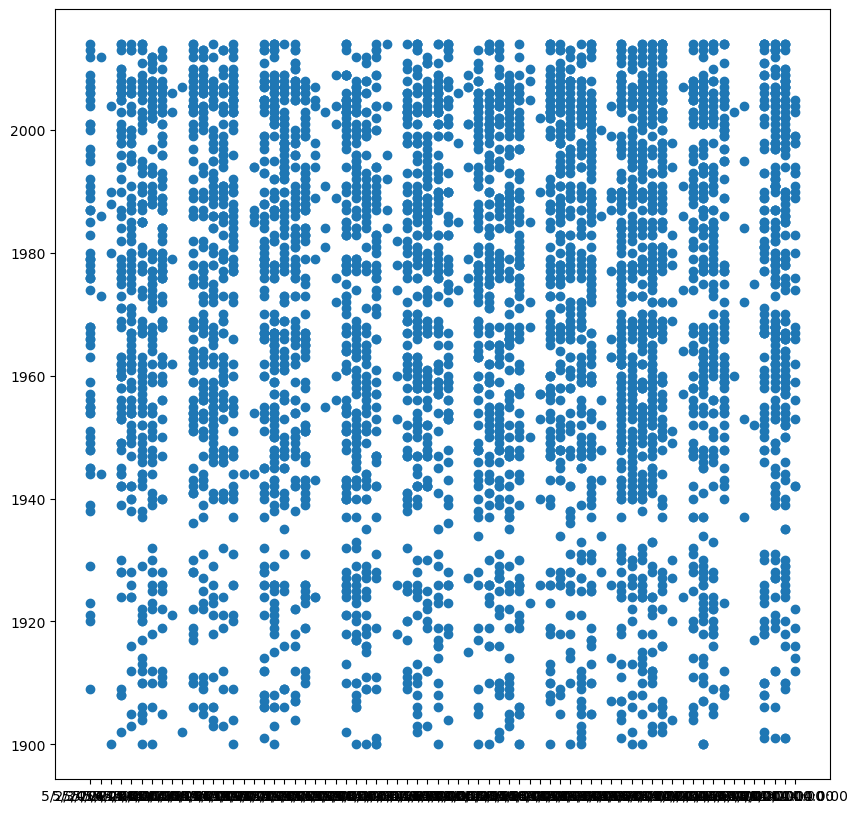

In [9]:
#visualization
fig = plt.figure(figsize=(10,10))
plt.scatter(data.date,data.yr_built)

In [10]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [11]:
#top price home 
topPrice = data['price'].sort_values(ascending=False).head(10)
topPrice

4350    26590000.0
4346    12899000.0
2286     7062500.0
2654     4668000.0
2761     4489000.0
3729     3800000.0
1637     3710000.0
252      3200000.0
1567     3100000.0
2772     3000000.0
Name: price, dtype: float64

In [12]:
Top_10_Rooms = pd.DataFrame({'price':data['price'],
                           'bedrooms':data['bedrooms'],
                            'bathrooms':data['bathrooms']            
                           })

In [78]:
Top_10_Rooms.sort_values(by="price", ascending=False).head(10)

,price,bedrooms,bathrooms
4350,26590000.0,3,2.00
4346,12899000.0,3,2.50
2286,7062500.0,5,4.50
2654,4668000.0,5,6.75
2761,4489000.0,4,3.00
3729,3800000.0,5,5.50
1637,3710000.0,4,3.50
252,3200000.0,7,4.50
1567,3100000.0,6,4.25
2772,3000000.0,4,4.25


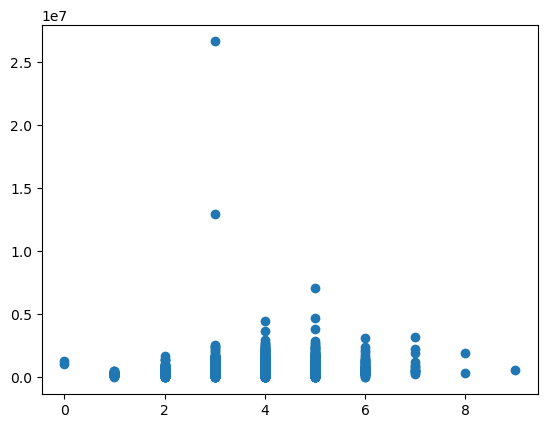

In [94]:
plt.scatter(Top_10_Rooms['bedrooms'],Top_10_Rooms['price'])

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


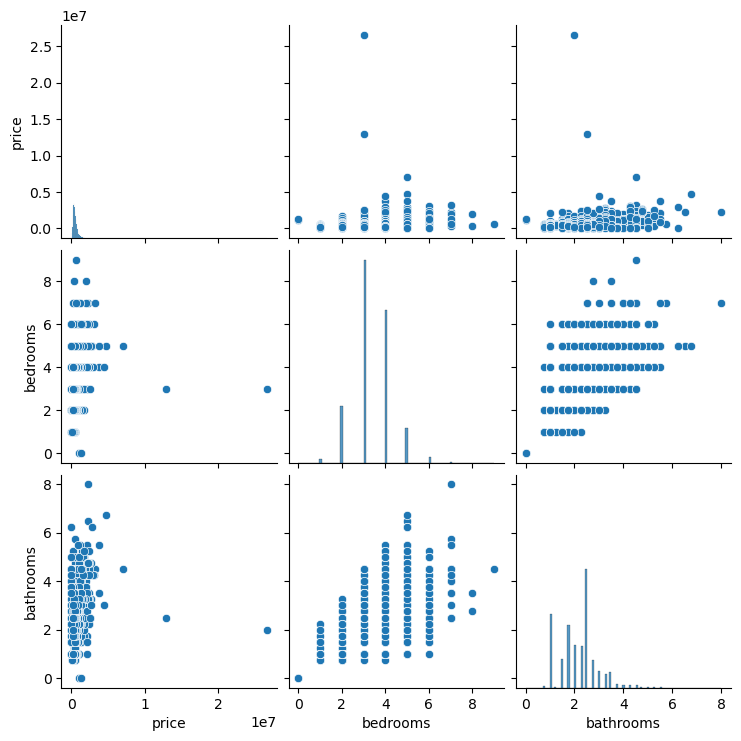

In [103]:
sns.pairplot(Top_10_Rooms)

plt.show()

In [13]:
additional_fea= pd.DataFrame({
    'waterfront':data['waterfront'],
    'view' :data['view'],
    'price':data['price']
})

In [14]:
sort_values=additional_fea.sort_values(by="price", ascending=False).head(10)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


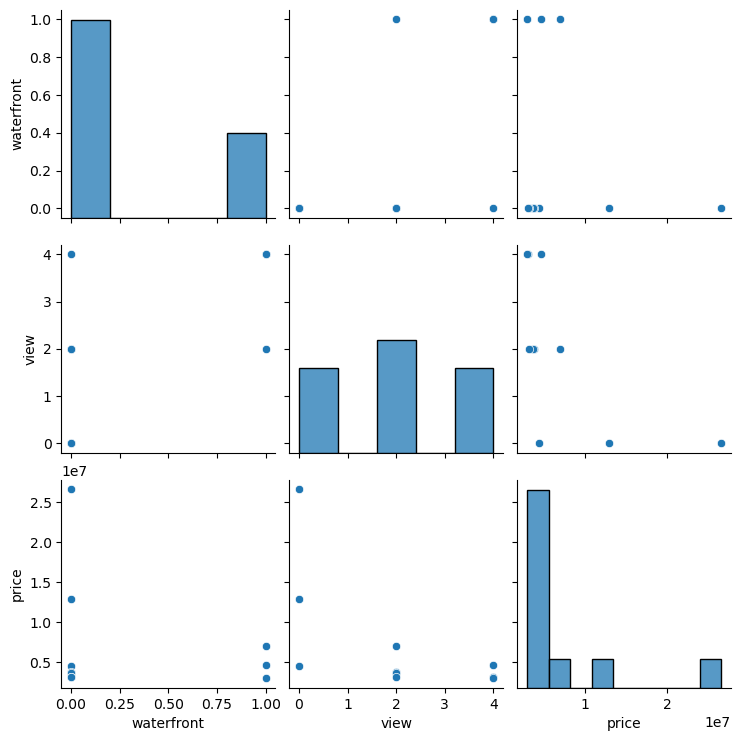

In [127]:
sns.pairplot(sort_values)

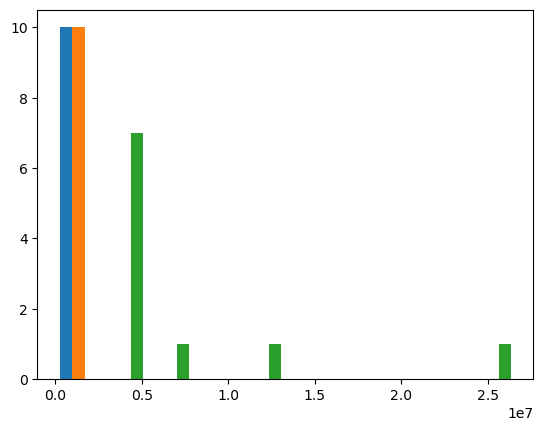

In [132]:
plt.hist(sort_values)
plt.legend
plt.show()

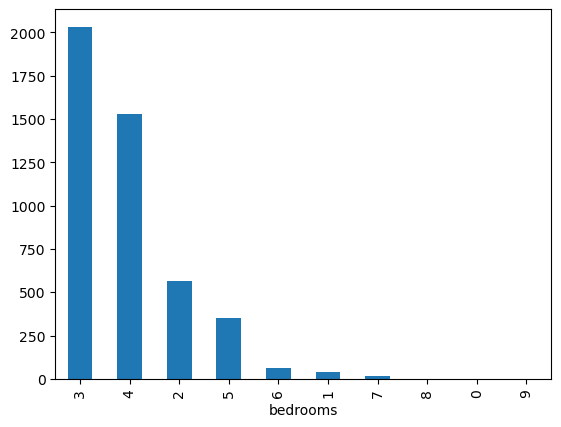

In [162]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.show()

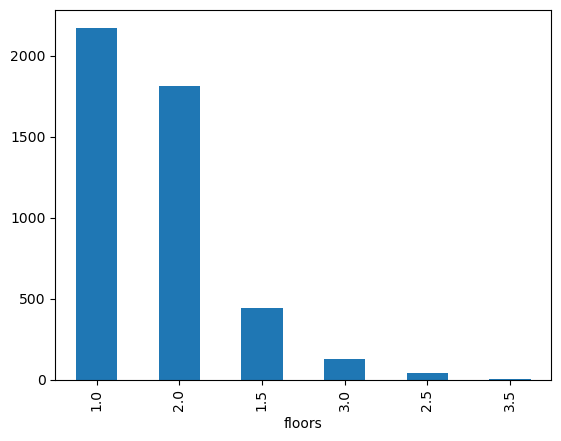

In [163]:
data.floors.value_counts().plot(kind='bar')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [16]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

### To Check for Data connection in dataset, its will increase accuracy increase

<BarContainer object of 4600 artists>

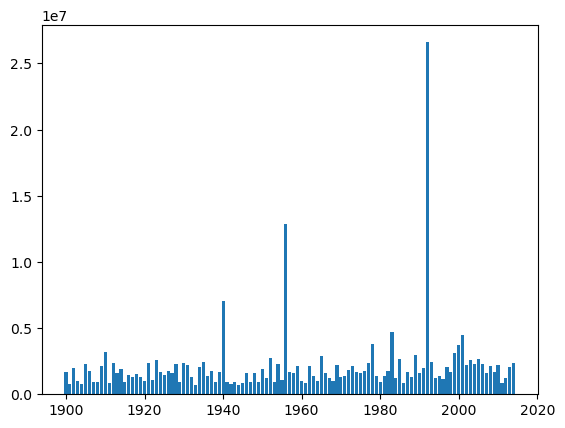

In [17]:
plt.bar(data['yr_built'],data['price'])

In [253]:
bulid = pd.DataFrame({'bulid':data['yr_built'],
                      'pricr':data['price']
                     })

<Axes: >

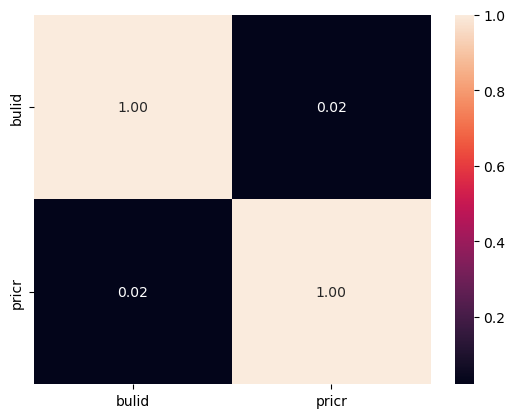

In [255]:
bulid_corr = bulid.corr()
sns.heatmap(bulid_corr, annot=True, fmt='.2f')

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


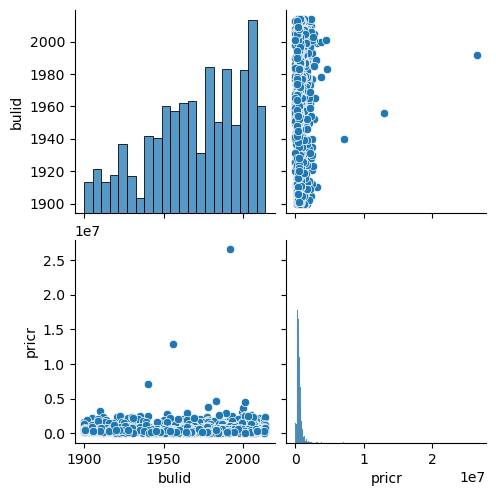

In [259]:
sns.pairplot(bulid)

<Axes: >

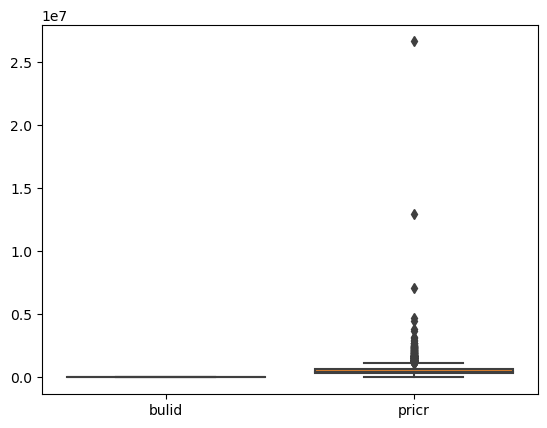

In [260]:
sns.boxplot(bulid)

In [49]:
trained = pd.DataFrame({'Bedrooms':data['bedrooms'],
                        'Bathrooms':data['bathrooms'],
                        'Floors':data['floors'],
                        #'Year_built':data['yr_built'],
                        #'City':data['city'],
                        'Sqft_Living':data['sqft_living']
                       })

In [51]:
# trained['City']=labelencoder.fit_transform(trained['City'])

In [52]:
Prd_Value = data['price']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,Prdi_trained, Prdi_test = train_test_split(trained,Prd_Value ,test_size = 30)

In [56]:
regression.fit(x_test,Prdi_test)

LinearRegression()

In [57]:
regression.score(x_test,Prdi_test)

0.5513872590840994

## graphical visual

In [58]:
y_pred = regression.predict(x_train)

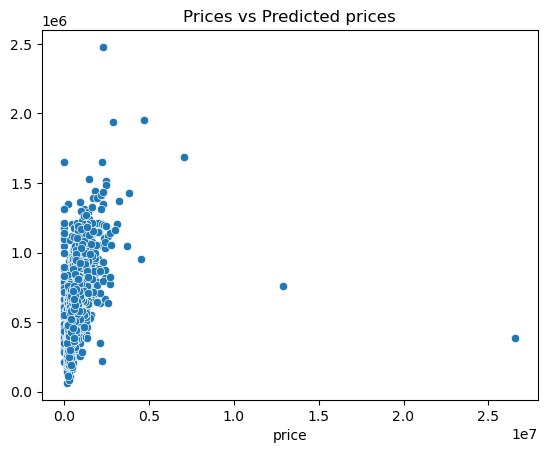

In [29]:
sns.scatterplot(x=Prdi_trained,y= y_pred)

plt.title("Prices vs Predicted prices")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21948\2727058986.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Prdi_trained-y_pred)


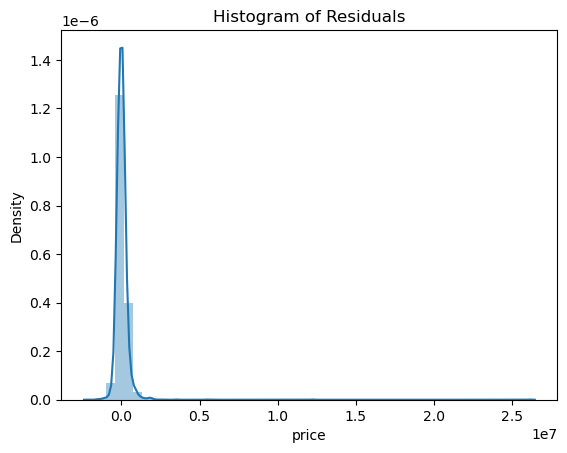

In [59]:
# Checking Normality of errors
sns.distplot(Prdi_trained-y_pred)
plt.title("Histogram of Residuals")
plt.show()

# Use Another Model - XGBoost

In [60]:
from xgboost import XGBRegressor

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
xgb= XGBRegressor()

In [62]:
xgb.fit(x_test,Prdi_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
xgb.score(x_test,Prdi_test)

0.9999999999860554

# Use Another Model - SVM Regressor

In [64]:
from sklearn import svm

In [65]:
svm = svm.SVR()

In [66]:
svm.fit(x_test,Prdi_test)

SVR()

In [67]:
svm.score(x_test,Prdi_test)

-0.08831705579591831

# Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rad = RandomForestRegressor()

In [70]:
rad.fit(x_test,Prdi_test)

RandomForestRegressor()

In [71]:
rad.score(x_test,Prdi_test)

0.8900969920257789

Linear regression assumes that the target variable can be expressed as a linear combination of the independent variables (plus error). If the data does not follow this assumption, the model may not capture the true relationship and produce inaccurate or unstable estimates


XGBoost is a type of gradient boosting algorithm that uses decision trees as base learners. It iteratively adds trees to the ensemble and fits them to correct the prediction errors made by prior models. The values of the model depend on the number of trees, the learning rate, the depth of the trees, the regularization parameters, and the loss function used2. These parameters can be tuned to improve the model performance and reduce overfitting.

SVM regression tries to find a hyperplane that separates the data points with a maximum margin. It uses a kernel function to map the data to a higher-dimensional space where the separation is possible. The values of the model depend on the choice of the kernel function, the penalty parameter, and the epsilon parameter that controls the width of the margin3. These parameters can affect the complexity and generalization ability of the model.

Random forest is another type of ensemble method that uses decision trees as base learners. It creates many trees from random subsets of the data and features, and averages their predictions. The values of the model depend on the number of trees, the maximum depth of the trees, the minimum number of samples required to split a node, and the criterion used to measure the quality of a split4. These parameters can influence the diversity and accuracy of the trees.

In [75]:
print('random forest: ',rad.score(x_test,Prdi_test))
print('XGBoost :',xgb.score(x_test,Prdi_test))
print('linear regresstion :',regression.score(x_test,Prdi_test))
print('SVM Regressor : ',svm.score(x_test,Prdi_test))

random forest:  0.8900969920257789
XGBoost : 0.9999999999860554
linear regresstion : 0.5513872590840994
SVM Regressor :  -0.08831705579591831


In [72]:
trained.columns

Index(['Bedrooms', 'Bathrooms', 'Floors', 'Sqft_Living'], dtype='object')

In [73]:
#linear regresstion model calculation 

regression.predict([[2,3,1,2300]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([925564.72101602])

In [77]:
# XGBoost
xgb.predict([[2,3,1,2300]])

array([451225.06], dtype=float32)

In [78]:
#random forest

rad.predict([[2,3,1,2300]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([416460.])

In [ ]:
#svm very low values